In [1]:
import pandas as pd

In [80]:
file = "C://Users/shawn/GitLabClone/02-Homework/20-Unsupervised-Learning/Instructions/crypto_data.csv"

In [87]:
crypto_df = pd.read_csv(file, index_col = 0)

In [88]:
crypto_df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [89]:
#Count dataframe rows
crypto_df.count()

CoinName           1252
Algorithm          1252
IsTrading          1252
ProofType          1252
TotalCoinsMined     744
TotalCoinSupply    1252
dtype: int64

In [90]:
#Iterate through rows to identify what columns have null values
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [91]:
#Filter dataframe on column 'IsTrading' if column value = 'True'
trading = crypto_df.loc[crypto_df['IsTrading'] == True]

In [92]:
#Filter out rows from dataframe if any value in row is NaN
trading_clean = trading.dropna(how='any')

In [93]:
#Filter dataframe to show only 'TotalCoinsMined' > 0
trading_clean_2 = trading_clean.loc[trading_clean['TotalCoinsMined'] > 0]

In [94]:

trading_clean_2.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [60]:
#Check for duplicate entries
print(f"Duplicate entries: {trading_clean_2.duplicated().sum()}")

Duplicate entries: 0


In [95]:
#Remove 'CoinName' and 'IsTrading' columns
trading_clean_3 = trading_clean_2.drop(columns=['CoinName','IsTrading'])

In [96]:
#View dataframe
trading_clean_3.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [97]:
#View remaining row counts
trading_clean_3.count()

Algorithm          532
ProofType          532
TotalCoinsMined    532
TotalCoinSupply    532
dtype: int64

In [98]:
#Convert Algorithm and ProofType into Dummy Variables
crypto_final = pd.get_dummies(trading_clean_3, columns=['Algorithm', 'ProofType'], drop_first=True)

In [99]:
crypto_final.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Examine the number of rows and columns of your dataset now. How did they change?

Dataframe columns increased to 96 in order to convert 'Algorithm' and 'ProofType' columns to numerical data.

In [100]:
#import Standard Skaler from sklearn and scale data before processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_final)

In [119]:
#View scaled data
scaled_data[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.06142951,
       -0.07530656, -0.0433963 , -0.06142951, -0.06142951, -0.0433963 ,
       -0.0433963 , -0.19245009, -0.06142951, -0.09740465, -0.0433963 ,
       -0.11547005, -0.07530656, -0.0433963 , -0.0433963 , -0.15191091,
       -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 , -0.08703883,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.06142951,
       -0.0433963 , -0.08703883, -0.08703883, -0.08703883, -0.0433963 ,
       -0.13118084, -0.13840913, -0.13840913, -0.0433963 , -0.06142951,
       -0.0433963 , -0.07530656, -0.18168574, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.07530656, -0.15826614, -0.31491833, -0.0433963 ,
       -0.08703883, -0.07530656, -0.06142951,  1.38675049, -0.0433963 ,
       -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.39879994, -0.0433963 , -0.18168574, -0.0433963 , -0.08

# PCA Model

In [151]:
#Import PCA from sklearn
from sklearn.decomposition import PCA

#Initialize PCA model and preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.9)

#Fit the model
pca_model = pca.fit_transform(scaled_data)

#Check how many columns PCA reduced dataset to.
pca_columns = pd.DataFrame(pca_model)
pca_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,2.601561e-14,6.522550e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,4.771880e-16,-3.658501e-15,-4.195183e-16,1.310193e-15,-1.959094e-15,1.556045e-15,2.226507e-15,5.911445e-16,-3.078212e-15,3.872931e-16
1,-0.319249,1.043547,-0.537804,0.001337,2.629941e-14,6.540291e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,8.020778e-16,-3.375755e-15,1.088861e-16,1.133463e-15,-1.820442e-15,1.301803e-15,1.699764e-15,4.381857e-16,-3.092618e-15,5.001934e-16
2,2.304716,1.669996,-0.624077,0.004420,3.966537e-14,9.596858e-14,-0.062312,-1.554093,-0.945690,0.375087,...,6.821266e-15,2.501708e-14,-1.564621e-14,-6.775102e-15,-6.239732e-14,1.767195e-14,3.937774e-15,9.510967e-15,-8.014290e-15,-1.749375e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-9.302608e-15,-2.509897e-14,0.000326,0.283548,0.252906,-0.079820,...,-7.503107e-15,1.140211e-14,5.528911e-16,-1.190721e-14,-5.476968e-15,5.672859e-15,-6.422268e-16,1.869553e-15,-9.226112e-16,-6.705759e-15
4,-0.151951,-2.044976,0.364208,-0.001636,-2.157542e-14,-4.687778e-14,0.032350,0.524429,0.191031,0.074021,...,-2.028875e-13,1.068663e-13,3.192552e-14,-7.471559e-14,-8.782977e-14,-1.492744e-15,3.060897e-14,4.285098e-14,9.924138e-14,1.037389e-13


# PCA Results

Reduced columns to 74.

# TSNE

In [152]:
#Import TSNE from sklearn
from sklearn.manifold import TSNE

#Run TSNE model on PCA Model output
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pca_model)

#Ensure dimensions have been reduced to two
tsne_features.shape

(532, 2)

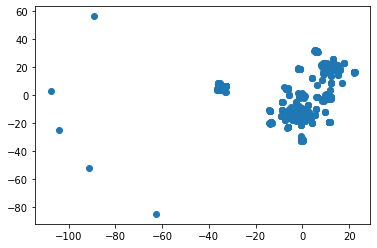

In [153]:
#Import matplotlib to create scatter plot of data
import matplotlib.pyplot as plt
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# TSNE Results

There are no distinct clusters observable.

C:\Users\shawn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


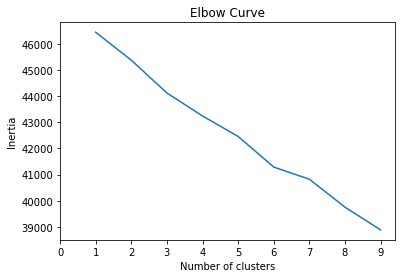

In [154]:
from sklearn.cluster import KMeans

# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_model)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(10)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendation

It appears that there is a slight elbow curve signifying that 6 clusters are most desireable. Based on how slight the curve is, I wouldn't recommend clustering for cryptocurrencies.

In [155]:
# Predicting clusters with k=6

# Initialize the k-means model
model = KMeans(n_clusters=6, random_state=0)

# Fit the model
model.fit(pca_model)

# Predict clusters
predictions = model.predict(pca_model)

# Creating a dataframe with PCA data
kmeans_model = pd.DataFrame(pca_model)


# Add the predicted class column to the dataframe
kmeans_model["Class Prediction"] = model.labels_

#View predicted classes
kmeans_model.head(50)

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,Class Prediction
0,-0.335914,1.043405,-0.537409,0.001347,2.601561e-14,6.522550e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,-3.658501e-15,-4.195183e-16,1.310193e-15,-1.959094e-15,1.556045e-15,2.226507e-15,5.911445e-16,-3.078212e-15,3.872931e-16,0
1,-0.319249,1.043547,-0.537804,0.001337,2.629941e-14,6.540291e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,-3.375755e-15,1.088861e-16,1.133463e-15,-1.820442e-15,1.301803e-15,1.699764e-15,4.381857e-16,-3.092618e-15,5.001934e-16,0
2,2.304716,1.669996,-0.624077,0.004420,3.966537e-14,9.596858e-14,-0.062312,-1.554093,-0.945690,0.375087,...,2.501708e-14,-1.564621e-14,-6.775102e-15,-6.239732e-14,1.767195e-14,3.937774e-15,9.510967e-15,-8.014290e-15,-1.749375e-14,0
3,-0.145455,-1.323925,0.177429,-0.001167,-9.302608e-15,-2.509897e-14,0.000326,0.283548,0.252906,-0.079820,...,1.140211e-14,5.528911e-16,-1.190721e-14,-5.476968e-15,5.672859e-15,-6.422268e-16,1.869553e-15,-9.226112e-16,-6.705759e-15,4
4,-0.151951,-2.044976,0.364208,-0.001636,-2.157542e-14,-4.687778e-14,0.032350,0.524429,0.191031,0.074021,...,1.068663e-13,3.192552e-14,-7.471559e-14,-8.782977e-14,-1.492744e-15,3.060897e-14,4.285098e-14,9.924138e-14,1.037389e-13,4
5,-0.166203,-1.125277,-0.008683,-0.000573,-8.429798e-16,-2.241553e-15,0.013280,-0.400212,-0.026084,-0.124199,...,-4.483282e-15,-9.668904e-16,2.450015e-15,-3.218697e-15,2.139880e-15,2.437631e-15,9.056591e-16,-5.130982e-15,-1.505694e-15,4
6,-0.396126,1.247879,-0.471372,0.001380,2.182929e-14,5.735381e-14,-0.009251,-1.003112,0.142399,-0.311472,...,-4.331636e-15,-2.520512e-15,1.017230e-15,-3.576130e-15,9.261522e-16,4.909088e-15,-8.489627e-16,9.040835e-16,-2.242649e-16,0
7,-0.149777,-2.232984,0.388988,-0.001762,-1.817637e-14,-5.308611e-14,0.036962,0.336875,0.311877,0.000803,...,3.607060e-13,1.279817e-13,-2.688113e-13,-2.486332e-13,-2.091735e-14,2.782398e-13,8.896797e-14,2.802902e-13,2.327951e-13,4
8,-0.150393,-2.045078,0.364190,-0.001634,-2.173129e-14,-4.678928e-14,0.032332,0.524131,0.190511,0.074381,...,1.067489e-13,3.180871e-14,-7.469709e-14,-8.782613e-14,-1.285021e-15,3.086913e-14,4.289867e-14,9.927858e-14,1.037084e-13,4
9,-0.149545,-2.058994,0.379620,-0.001675,-2.036844e-14,-5.204856e-14,0.033757,0.550420,0.235951,0.074012,...,-3.307197e-15,7.668710e-16,7.764716e-16,-6.302008e-15,2.932703e-15,1.585819e-15,2.121646e-15,-3.323160e-15,-1.554016e-16,4
